<a href="https://colab.research.google.com/github/woraphonp-038-5/Project-Big-Data/blob/main/Copy_of_Text_Analytics68.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 1: Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="500" />

ชื่อกลุ่ม: เฟิร์สมินอย

รายชื่อสมาชิก การแบ่งงาน และสัดส่วนในการทำงาน:
1. นายวรพล พลตรี 663020038-5
2. นายวิศรุต แสนบึง 663020296-3
3. นางสาวพัชรี ดียา
4. นางสาวศิริวรรณ นวลวัน 663020585-6
5. นายเสฎฐวุฒิ นาคสังข์ 663020586-4

กำหนดส่ง: อาทิตย์ 5 ตุลาคม 2568 \
รายงานในชั้นเรียน: จันทร์ 6 ตุลาคม 2568

**ผลที่คาดหวังจากการทำงานนี้**
* สามารถใช้ Python ในการอ่านข้อมูล
* จัดการกับข้อมูลเบื้องต้นในรูปแบบข้อความก่อนนำไปวิเคราะห์
* สามารถวิเคราะห์ข้อมูลตัวอักษรเบื้องต้นและสร้าง Data Visualization ที่เหมาะสมได้
----------------------

In [1]:
# หากไม่สามารถลง library ใด ให้ดาวน์โหลดดังตัวอย่างต่อไปนี้
!pip install nltk
!pip install wordcloud
!pip install Pillow
# Load these libraries
import json
import pprint
import pandas as pd
import numpy as np
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Working with Twitter Data and JSON file
*หมายเหตุ: ไม่ต้องนำเสนอข้อนี้*

จากข้อมูลทวิตเตอร์เกี่ยวกับประเทศไทยที่เก็บในวันที่ 31 สิงหาคม 2565 ในรูปแบบ JSON จาก `thailand_tweets.txt` ซึ่งมีการดึงข้อมูลมาด้วยคีเวิร์ด "Thailand" ให้ทำการศึกษาข้อมูลและดึงค่าจากข้อมูล \
ทั้งนี้เราสามารถเรียกหน้าทวีตจาก tweet ID ได้ดังนี้
```
twitter.com/anyuser/status/<tweet_id>
```


#### Read JSON file

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# เปลี่ยน path ตรงนี้
file_path = data = '/content/drive/MyDrive/DATAW/thailand_tweets.txt'

In [52]:
data = ('/content/drive/MyDrive/DATAW/thailand_tweets.txt')

#### Inspect data in JSON format (either reading using pretty print or Pandas data frame)

In [53]:
# ----------------- Your code here -----------------
df_tweets.head()

,0
0,"{""1564764893038882816"": {""tweet_id"": ""15647648..."


In [54]:
import json
import pandas as pd

file_path = '/content/drive/MyDrive/DATAW/thailand_tweets.txt'

tweets = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        try:
            tweet = json.loads(line.strip())   # แปลงแต่ละบรรทัดเป็น dict
            tweets.append(tweet)
        except:
            continue  # ข้ามบรรทัดที่แปลงไม่ได้

print("จำนวน tweets:", len(tweets))

# แปลงเป็น DataFrame
df = pd.DataFrame(tweets)
print(df.head())


จำนวน tweets: 1
                                                   0
0  {"1564764893038882816": {"tweet_id": "15647648...


In [55]:
import json
import pandas as pd

with open(file_path, 'r', encoding='utf-8') as f:
    raw_text = f.read()

print("ก่อน parse:", type(raw_text))  # น่าจะได้ str

# parse รอบแรก
outer = json.loads(raw_text)
print("หลัง parse 1:", type(outer))

# ถ้ายังเป็น str → parse อีกรอบ
if isinstance(outer, str):
    outer = json.loads(outer)
    print("หลัง parse 2:", type(outer))

print("จำนวน keys:", len(outer))

# แปลงเป็น DataFrame
df = pd.DataFrame.from_dict(outer, orient='index')
print(df.head())
print(df.columns)



ก่อน parse: <class 'str'>
หลัง parse 1: <class 'str'>
หลัง parse 2: <class 'dict'>
จำนวน keys: 29
                                tweet_id        username  \
1564764893038882816  1564764893038882816      matthunter   
1564764866598080513  1564764866598080513      DavSmithVP   
1564764845685280772  1564764845685280772    DailyPattaya   
1564764710804897792  1564764710804897792   Bryan62766077   
1564764468277612549  1564764468277612549  Megan_and_Grrr   

                                               name  \
1564764893038882816                     MATT HUNTΞR   
1564764866598080513  DavSmith / Virtual Photography   
1564764845685280772               The Pattaya Daily   
1564764710804897792                           Bryan   
1564764468277612549                           Megan   

                                              profile_picture  replies  \
1564764893038882816      https://twitter.com/matthunter/photo        2   
1564764866598080513      https://twitter.com/DavSmithVP/photo 

In [59]:
# ตรวจสอบ 5 แถวแรก
print(df.head())

# content ของ first tweet
print("First tweet content:")
print(df.iloc[0]["content"])

# hashtags และ mentions ของ first tweet
print("Hashtags:", df.iloc[0]["hashtags"])
print("Mentions:", df.iloc[0]["mentions"])


                                tweet_id        username  \
1564764893038882816  1564764893038882816      matthunter   
1564764866598080513  1564764866598080513      DavSmithVP   
1564764845685280772  1564764845685280772    DailyPattaya   
1564764710804897792  1564764710804897792   Bryan62766077   
1564764468277612549  1564764468277612549  Megan_and_Grrr   

                                               name  \
1564764893038882816                     MATT HUNTΞR   
1564764866598080513  DavSmith / Virtual Photography   
1564764845685280772               The Pattaya Daily   
1564764710804897792                           Bryan   
1564764468277612549                           Megan   

                                              profile_picture  replies  \
1564764893038882816      https://twitter.com/matthunter/photo        2   
1564764866598080513      https://twitter.com/DavSmithVP/photo        0   
1564764845685280772    https://twitter.com/DailyPattaya/photo        0   
156476471080

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1564764893038882816 to 1564761905410875392
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         29 non-null     object
 1   username         29 non-null     object
 2   name             29 non-null     object
 3   profile_picture  29 non-null     object
 4   replies          29 non-null     int64 
 5   retweets         29 non-null     int64 
 6   likes            29 non-null     int64 
 7   is_retweet       29 non-null     bool  
 8   posted_time      29 non-null     object
 9   content          29 non-null     object
 10  hashtags         29 non-null     object
 11  mentions         29 non-null     object
 12  images           29 non-null     object
 13  videos           29 non-null     object
 14  tweet_url        29 non-null     object
 15  link             29 non-null     object
dtypes: bool(1), int64(3), object(12)
memory usage: 3.7+ 

#### Report: จงตอบคำถามต่อไปนี้
* The total number of tweets collected in the file
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts  
* Display the top 5 tweets that are the most popular among your collection \
สามารถใช้ `np.argsort(<list>)[:5]` ซึ่งจะแสดงผล indices ของการเรียงค่าจากน้อยสุดไปมากสุด จำนวน 5 ค่า และ `np.argsort(<list>)[::-1][:5]` จะแสดงผล indices ของการเรียงค่าจากมากไปน้อยจำนวน 5 ค่า (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

#### The total number of tweets collected in the file


In [68]:
# The total number of tweets collected in the file
total_tweets = len(df)
print("Total number of tweets:", total_tweets)

Total number of tweets: 29


#### The content of the first tweet

In [69]:
# The content of the first tweet
first_tweet_content = df.iloc[0]["content"]
print("\nContent of the first tweet:")
print(first_tweet_content)



Content of the first tweet:
Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 


#### Is the first tweet contained any hashtags or mentions?

In [70]:
# Is the first tweet contained any hashtags or mentions?
first_tweet_hashtags = df.iloc[0]["hashtags"]
first_tweet_mentions = df.iloc[0]["mentions"]

print("\nFirst tweet contains hashtags:", bool(first_tweet_hashtags))
print("First tweet contains mentions:", bool(first_tweet_mentions))


First tweet contains hashtags: False
First tweet contains mentions: False


#### Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts

In [76]:
import numpy as np
# สร้าง score ของความนิยม
popularity_score = df['retweets'] + df['replies'] + df['likes']
# หา index ของ tweet ที่มี score สูงสุด
most_popular_index = np.argmax(popularity_score)
# แสดง tweet ที่ most popular
most_popular_tweet = df.iloc[most_popular_index]

print("Most popular tweet:")
print("Username:", most_popular_tweet['username'])
print("Content:", most_popular_tweet['content'])
print("Replies:", most_popular_tweet['replies'])
print("Retweets:", most_popular_tweet['retweets'])
print("Likes:", most_popular_tweet['likes'])


Most popular tweet:
Username: OhmPawatInter
Content: Trend twitter update 

Top Twitter influencers in Thailand today 
#4 
@ohmpawatt
Influence Score: 19442
7 top tweets
25182 retweets

https://etrenders.com/trendsetters/Thailand…
#ohmpawat #ยิ้ม5พันของโอมภวัต
Replies: 0
Retweets: 99
Likes: 143


#### Collect all hashtags related to Thailand

In [67]:
# Collect all hashtags from the 'hashtags' column
all_hashtags = [hashtag for sublist in df['hashtags'] for hashtag in sublist]

# Filter for hashtags that contain "Thailand" (case-insensitive)
thailand_hashtags = [hashtag for hashtag in all_hashtags if 'thailand' in hashtag.lower()]

print("All Thailand-related hashtags:", thailand_hashtags)

All Thailand-related hashtags: ['thailand', 'Thailand']


#### Find and display the top 5 most popular tweets

In [61]:
# Calculate popularity score (sum of replies, retweets, and likes)
df['popularity'] = df['replies'] + df['retweets'] + df['likes']

# Find the indices of the top 5 most popular tweets
top_5_indices = df['popularity'].nlargest(5).index

# Display the top 5 most popular tweets
print("Top 5 most popular tweets:")
display(df.loc[top_5_indices, ['content', 'replies', 'retweets', 'likes', 'popularity']])

Top 5 most popular tweets:


,content,replies,retweets,likes,popularity
1564764445825458181,Trend twitter update \n\nTop Twitter influence...,0,99,143,242
1564762341324992513,Can you help me?\n\ntracking number\nFMP200001...,2,54,32,88
1564763729967054848,วันนี้วันสุดท้ายของการโหวต รางวัล Outstanding ...,0,28,15,43
1564764361742110720,Good morning world! And goodmorning to you to...,0,2,18,20
1564763185244426240,"พร้อมครัช\n\nPlease,come to thailand.\n \n\n#J...",1,7,7,15


#### Create a word cloud of words in the contents

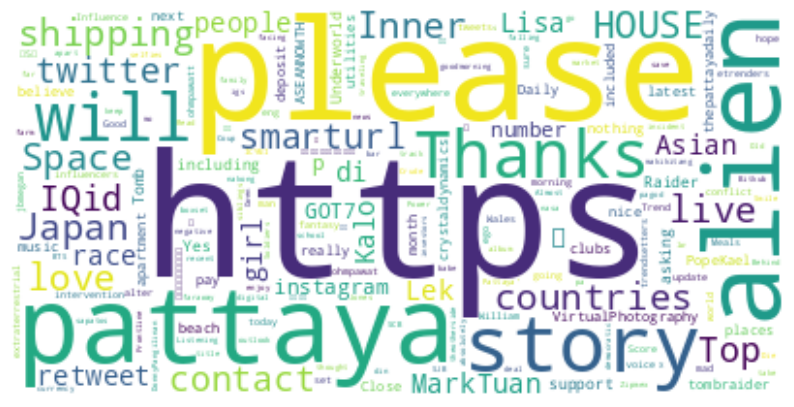

In [62]:
# Combine all the tweet content into a single string
all_content = " ".join(df['content'])

# Create a WordCloud object
# You can add more stopwords if needed
stopwords = set(STOPWORDS)
stopwords.update(["Thailand", "thailand"]) # Add "Thailand" to stopwords as it's in every tweet

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_content)

# Display the generated word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Problem 2: Study Collected Yelp Reviews

![](https://techcrunch.com/wp-content/uploads/2022/08/Yelp-Android_Full-Experience.jpg?w=1390&crop=1)

ดาวน์โหลด Yelp dataset เกี่ยวกับรีวิวของผู้ใช้บริการธุรกิจต่าง ๆ จาก https://www.yelp.com/dataset
<br>
รายละเอียดข้อมูล https://www.yelp.com/dataset/documentation/main
<br>
ให้ศึกษาข้อมูลจากไฟล์ yelp_academic_dataset_review.json, yelp_academic_dataset_business.json, และ yelp_academic_dataset_user.json

### อ่านข้อมูล Reviews, Businesses, และ Users เป็นจำนวน 100,000 รีวิว

In [ ]:
# เปลี่ยน path ของ working directory เช่น ที่ไหนใน Google Drive
myDirectory = "/Users/pitchayaw/Desktop/TeachingKKU/BasicOfDS/CaseStudy2/"
reviewFilePath = "yelp_academic_dataset_review.json"
businessFilePath = "yelp_academic_dataset_business.json"
userFilePath = "yelp_academic_dataset_user.json"

อ่านข้อมูล review

In [ ]:
# We only use the first 100,000 reviews
n = 100000
reviews = []
with open(myDirectory+reviewFilePath) as fl:
    for i, line in enumerate(fl):
        reviews.append(json.loads(line))
        if i+1 >= n:
            break
reviews = pd.DataFrame(reviews)
reviews.head()

In [ ]:
reviews.info()

อ่านข้อมูล business

In [ ]:
businesses = []
with open(myDirectory+businessFilePath) as fl:
    for i, line in enumerate(fl):
        businesses.append(json.loads(line))
businesses = pd.DataFrame(businesses)
businesses.head()

In [ ]:
businesses.info()

อ่านข้อมูล user

In [ ]:
users = []
with open(myDirectory+userFilePath) as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
users = pd.DataFrame(users)
users.head()

In [ ]:
users.info()

### รวมข้อมูล Reviews, Businesses, และ Users และสำรวจตัวแปรในข้อมูล

In [ ]:
# join reviews and businesses data using inner join
df = pd.merge(reviews, businesses, on='business_id', suffixes=('_review', '_business'))
# join reviews-businesses and users data using inner join
df = pd.merge(df, users, on='user_id', suffixes=('_review_business', '_user'))
df

### ทำการสำรวจข้อมูลเบื้องต้น

In [ ]:
df.info()

สำรวจการแจกแจงของจำนวนรีวิวที่แต่ละ user ให้

In [ ]:
# ----------------- Your code here -----------------


สำรวจการแจกแจงของจำนวนรีวิวและจำนวนดาวที่แต่ละ business ได้รับ

In [ ]:
# ----------------- Your code here -----------------


มีธุรกิจกี่แบบ และธุรกิจในแต่ละแบบมีจำนวนเท่าไหร่

* ลองแยก `categories` ออกเป็น category ย่อย แล้วสามารถนับหรือใช้ฟังก์ชัน Counter `from collections import Counter` ในการนับจำนวนหรือความถี่ของธุรกิจแต่ละแบบ \
ตัวอย่าง https://www.geeksforgeeks.org/counters-in-python-set-1/

In [ ]:
# ----------------- Your code here -----------------


### ให้ตั้งปัญหาหรือคำถาม และวิเคราะห์ข้อมูลเพื่อตอบคำถามดังกล่าว

<ระบุจุดประสงค์ของการศึกษา>

In [ ]:
# ----------------- Your code here -----------------


In [ ]:
#----------------------------------------------
# Your code starts here
# create some data visualization for the analysis and your presentation






## Problem 3: Retrieving Data from Internet

ให้แต่ละกลุ่มคิดหัวข้อที่สนใจ และทำการดึงข้อมูลเกี่ยวกับหัวข้อที่สนใจผ่าน url ด้วยฟังก์ชัน `urllib.request.urlopen` จากแหล่งข้อมูลออนไลน์อย่างน้อย 10 แห่ง รวบรวมข้อมูลให้เป็นหนึ่งเดียว

In [ ]:
#----------------------------------------------
# Your code starts here


เตรียมข้อมูลและทำความสะอาดข้อมูลด้วยการทำ lower case, tokenization, removing stopwords (as well as punctuations, unrelated symbols, etc.), stemming, lemmatization เป็นต้น

In [ ]:
#----------------------------------------------
# Your code starts here


Text Mining: ทำการวิเคราะห์ข้อความที่รวบรวมมาได้ พร้อมทั้งแสดงการนำเสนอที่สร้างสรรค์

In [ ]:
#----------------------------------------------
# Your code starts here


-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
    * ตอบคำถามต่าง ๆ ใน Notebook
    * อธิบายวิธีการที่ใช้ และแสดง screenshots ของผลลัพธ์ที่ได้จาก Python Notebook โดยแสดงภาพและตาราง โดยไม่จำเป็นที่จะต้องนำเสนอ source code

** Note: แต่ละกลุ่มส่งแค่ครั้งเดียว **